In [1]:
# importa, seta configuracao, le arquivo e tira colunas 'unnamed'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv('dados_filtrados_v3.csv')
df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

In [2]:
x = df[['Média do período']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df['Média do período'] = df_normalized

x = df[['Menção na disciplina']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
df['Menção na disciplina'] = df_normalized

In [3]:
df = df.drop(columns=['Data de Nascimento', 'ID Aluno'])

In [4]:
cov = df.cov()
cov

,Sexo,Cotista,Período de Ingresso na Unb,Período de saída da opção,Ano e Semestre,Média do período,Créditos cursados no total,Créditos cursados no semestre(com aprovação),Código da disciplina,Créditos disciplina,Menção na disciplina,Curso_Ciência da Computação,Curso_Computação,Curso_Engenharia Mecatrônica,Curso_Engenharia de Computação,Curso_Engenharia de Redes de Comunicação,Curso_Engenharia de Software,Curso_Informática,Forma de saída da opção_Ativo,Forma de saída da opção_Deslig - não cumpriu condição,Forma de saída da opção_Desligamento - Abandono,Forma de saída da opção_Desligamento Decisão Judicial,Forma de saída da opção_Desligamento Falt Documentação,Forma de saída da opção_Desligamento Jubilamento,Forma de saída da opção_Desligamento Voluntário,Forma de saída da opção_Desligamento por Força de Intercãmbio,Forma de saída da opção_Desligamento-Força de Convênio,Forma de saída da opção_Falecimento,Forma de saída da opção_Formatura,Forma de saída da opção_Mudança de Curso,Forma de saída da opção_Mudança de Turno,Forma de saída da opção_Novo Vestibular,Forma de saída da opção_Outros,Forma de saída da opção_Repr 3 vezes na mesma disc obr,Forma de saída da opção_Transferência,Forma de saída da opção_Vestibular p/outra Habilitação,semestre,idade
Sexo,0.106904,0.000585,0.444608,-4.928720e+01,0.426030,0.003143,0.277760,0.065196,1.074432e+02,-0.003903,0.002752,0.001151,-0.001954,-0.006639,-0.000369,0.006407,0.001665,-2.612242e-04,0.002465,-0.005841,5.360856e-04,6.684544e-05,-5.197545e-06,-1.156454e-04,-5.416521e-04,2.812769e-05,4.220391e-06,-8.835827e-05,0.002888,1.377386e-03,-1.645889e-05,0.000849,-3.248466e-05,-1.338573e-03,-1.941046e-04,-4.114723e-05,0.001746,-0.064682
Cotista,0.000585,0.085429,4.880493,-3.675113e+02,4.511396,-0.006630,-4.239398,-0.266075,3.656973e+01,-0.004725,-0.006838,-0.008431,0.002292,-0.001869,0.004706,-0.002878,0.008056,-1.876305e-03,0.018427,0.001314,-1.080502e-03,-4.195674e-05,3.867328e-05,-8.961959e-05,-1.576176e-03,-3.020885e-06,-5.739682e-05,6.253586e-06,-0.021655,-4.248223e-04,-1.275485e-05,0.003466,2.417080e-04,2.046747e-03,-5.655743e-04,-3.188712e-05,-0.078551,-0.010048
Período de Ingresso na Unb,0.444608,4.880493,3830.878722,-2.974110e+05,3625.794255,-1.025076,-1802.488556,-56.904382,1.352274e+05,-4.381063,-1.150694,-8.333990,1.677828,0.341108,4.021355,-1.615109,5.315170,-1.406362e+00,14.917217,-0.835134,-6.048165e-01,-1.545976e-02,3.133392e-03,-4.025878e-02,-1.155635e+00,2.990561e-03,1.393094e-02,5.506456e-03,-14.256472,6.052083e-01,8.570207e-03,1.308871,1.184412e-02,4.468452e-01,-4.239733e-01,7.633052e-03,-39.132044,-26.192359
Período de saída da opção,-49.287199,-367.511322,-297411.028661,6.734962e+07,-283405.781695,19.924500,181583.605399,2876.059524,-8.653637e+06,613.771120,67.242939,530.109482,137.209662,31.643997,-416.455850,254.176634,-620.178878,8.349495e+01,-3353.131794,483.978795,1.249332e+02,1.869610e+00,1.840543e-01,4.049560e+00,1.311312e+02,1.383930e-01,2.588940e+00,3.097114e+00,2255.750260,7.884632e+01,5.843260e-01,134.784765,1.155677e+00,1.026442e+02,2.594960e+01,1.445830e+00,2535.693331,2813.731209
Ano e Semestre,0.426030,4.511396,3625.794255,-2.834058e+05,3735.650104,-0.764672,-1276.481421,-55.823078,2.366149e+05,-4.558122,-0.978592,-8.253293,1.570124,0.554363,3.810017,-1.245493,5.180293,-1.616011e+00,14.221018,-1.427046,-8.633052e-01,-2.300338e-02,2.273074e-03,-2.104637e-02,-1.425448e+00,2.343543e-03,2.609038e-03,-5.716223e-04,-11.953910,4.671969e-01,7.689129e-03,1.067415,1.472802e-02,3.928378e-01,-4.684581e-01,4.677750e-03,22.440034,-2.453317
Média do período,0.003143,-0.006630,-1.025076,1.992450e+01,-0.764672,0.045105,7.049512,1.318974,4.498658e+02,-0.006353,0.037796,-0.002025,-0.004883,0.005734,-0.001027,0.002432,0.000381,-6.123082e-04,-0.001015,-0.023472,-4.533437e-03,-1.163748e-04,-2.558105e-05,-1.213859e-04,-2.822311e-03,-6.090777e-06,-2.996665e-05,5.839132e-05,0.039983,5.971568e-04,-5.995016e-06,-0.003142,-8.007895e-06,-4.446308e-03,-8.453657e-04,-4.800975e-05,0.05404

In [51]:
corr = df.corr()
corr > 0.3

,Sexo,Cotista,Período de Ingresso na Unb,Período de saída da opção,Ano e Semestre,Média do período,Créditos cursados no total,Créditos cursados no semestre(com aprovação),Código da disciplina,Créditos disciplina,Menção na disciplina,Curso_Ciência da Computação,Curso_Computação,Curso_Engenharia Mecatrônica,Curso_Engenharia de Computação,Curso_Engenharia de Redes de Comunicação,Curso_Engenharia de Software,Curso_Informática,Forma de saída da opção_Ativo,Forma de saída da opção_Deslig - não cumpriu condição,Forma de saída da opção_Desligamento - Abandono,Forma de saída da opção_Desligamento Decisão Judicial,Forma de saída da opção_Desligamento Falt Documentação,Forma de saída da opção_Desligamento Jubilamento,Forma de saída da opção_Desligamento Voluntário,Forma de saída da opção_Desligamento por Força de Intercãmbio,Forma de saída da opção_Desligamento-Força de Convênio,Forma de saída da opção_Falecimento,Forma de saída da opção_Formatura,Forma de saída da opção_Mudança de Curso,Forma de saída da opção_Mudança de Turno,Forma de saída da opção_Novo Vestibular,Forma de saída da opção_Outros,Forma de saída da opção_Repr 3 vezes na mesma disc obr,Forma de saída da opção_Transferência,Forma de saída da opção_Vestibular p/outra Habilitação,semestre,idade
Sexo,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Cotista,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Período de Ingresso na Unb,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Período de saída da opção,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Ano e Semestre,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Média do período,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Créditos cursados no total,False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
Créditos cursados no semestre(com aprovação),False,False,False,False,False,True,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
Código da disciplina,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
Créditos disciplina,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [48]:
# retorna todas as colunas exceto as especificadas no array
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import radviz
from pandas.plotting import parallel_coordinates
# import seaborn as sns
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA as sklearnPCA

data = df[df.columns.difference(['Data de Nascimento', 'Período de Ingresso na Unb', 
                                    'Período de saída da opção', 'Ano e Semestre', 'Créditos cursados no total', 
                                    'Código da disciplina', 'ID Aluno', 'Unnamed: 0'])]
currentLabel = 'Menção na disciplina'

x = data.ix[:].values
y = data[currentLabel].values
num_components = 10#len(data.columns) -1

data[currentLabel]
numColors = len(data[currentLabel].unique())
sklearn_pca = sklearnPCA(n_components=num_components)
Y_sklearn = sklearn_pca.fit_transform(x)


[ 171.80242417  182.75647636  193.01032142  243.96467186  261.00325095
  298.38928214  695.23986937 1551.23453767 2249.32256707 4503.51815205]
[1 2 3 4 5 6 7 8 9]


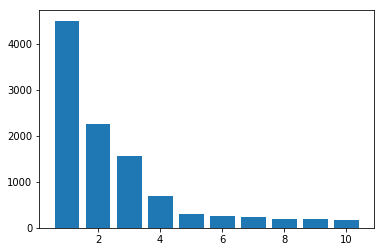

In [49]:

a = sklearn_pca.singular_values_
print(np.sort(a))
print(np.array(list(range(1,num_components))))
plt.bar(np.array(list(range(1,num_components+1))), a)
plt.show()

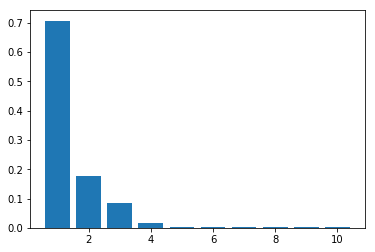

In [50]:
a = sklearn_pca.explained_variance_ratio_
plt.bar(np.array(list(range(1,num_components+1))), a)
plt.show()

In [46]:
sklearn_pca.components_

array([[-3.64183769e-03,  9.89964681e-01,  1.67844368e-03, ...,
         1.02001506e-03, -1.35635510e-01, -4.49815125e-03],
       [-4.84191143e-03,  1.07151050e-01,  1.34057333e-03, ...,
        -2.31545677e-03,  7.66676417e-01,  6.32151767e-01],
       [ 3.87452927e-03,  8.34583303e-02,  1.02562050e-02, ...,
        -4.34065222e-03,  6.26607154e-01, -7.73508963e-01],
       ...,
       [-3.92610906e-04,  2.42475811e-06,  1.12542231e-05, ...,
        -3.10061070e-05,  7.52422113e-06,  8.53662524e-06],
       [ 1.27335568e-04, -3.30091326e-06,  1.42086107e-06, ...,
        -2.89334054e-04, -1.75214809e-05,  1.34693795e-05],
       [-0.00000000e+00, -1.30712984e-16, -8.35713483e-17, ...,
        -1.00619330e-14, -2.39568490e-16,  1.30156545e-16]])